# Gradient Descent

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
X, y = np.loadtxt("ornek_data.txt", unpack=True)

<IPython.core.display.Javascript object>


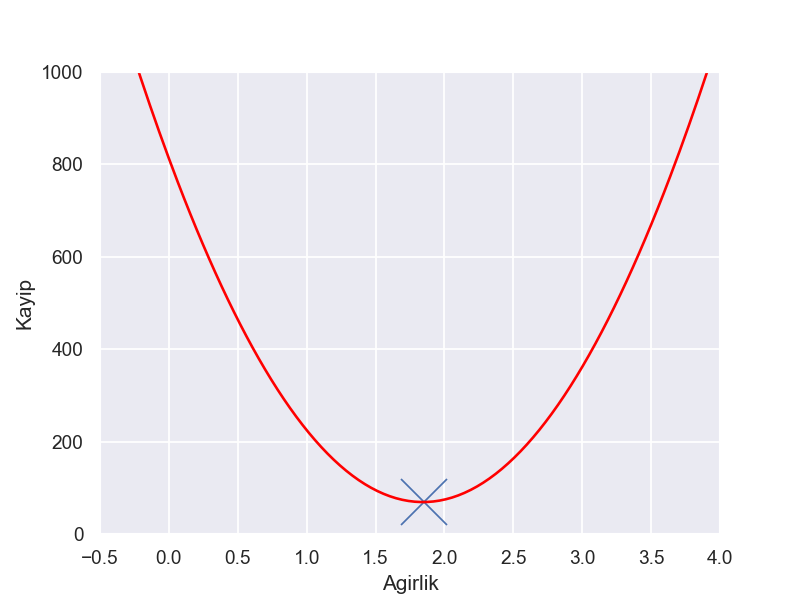

In [2]:
agirliklar = np.linspace(-0.5, 4.0, 200)
kayip = [np.average((X*w - y)**2) for w  in agirliklar]

plt.axis([-0.5, 4, 0, 1000])
plt.xlabel("Agirlik")
plt.ylabel("Kayip")
min_index = np.argmin(kayip)
plt.plot(agirliklar[min_index], kayip[min_index], "bx", markersize=26)
plt.plot(agirliklar, kayip, color="red")

Maliyet fonksiyonu

\begin{aligned}
L = \frac{1}{m}\sum_{i=1}^{m}\left ( \left ( wx_i \right )-y_i \right )^{2}
\end{aligned}

Maliyet fonksiyonunun w'ye göre türevi

\begin{aligned}\frac{\partial L}{\partial w} = \frac{2}{m}\sum_{i=1}^{m}x_i\left ( \left ( wx_i \right )-y_i \right )\end{aligned}


In [3]:
def gradyan(X, y, w):
    return 2*np.average(X*((X*w)-y))

# Training

w = 5

for i in range(50):
    kayip = np.average((X*w - y)**2)
    print("Iterasyon {}: Kayip: {}".format(i, kayip))
    w -= gradyan(X, y, w) * 0.001 # learning rate
print("w: {:.4f}".format(w))

Iterasyon 0: Kayip: 2248.866666666667
Iterasyon 1: Kayip: 758.5609273386668
Iterasyon 2: Kayip: 287.1865214970339
Iterasyon 3: Kayip: 138.09373830561762
Iterasyon 4: Kayip: 90.93662132113982
Iterasyon 5: Kayip: 76.0211194793595
Iterasyon 6: Kayip: 71.30343931953585
Iterasyon 7: Kayip: 69.81126652330785
Iterasyon 8: Kayip: 69.33930157901915
Iterasyon 9: Kayip: 69.19002201220191
Iterasyon 10: Kayip: 69.1428058167221
Iterasyon 11: Kayip: 69.1278716287209
Iterasyon 12: Kayip: 69.12314803824547
Iterasyon 13: Kayip: 69.12165399605328
Iterasyon 14: Kayip: 69.1211814398307
Iterasyon 15: Kayip: 69.12103197324626
Iterasyon 16: Kayip: 69.12098469789827
Iterasyon 17: Kayip: 69.12096974500072
Iterasyon 18: Kayip: 69.1209650154925
Iterasyon 19: Kayip: 69.12096351957858
Iterasyon 20: Kayip: 69.12096304643033
Iterasyon 21: Kayip: 69.12096289677649
Iterasyon 22: Kayip: 69.12096284944194
Iterasyon 23: Kayip: 69.1209628344703
Iterasyon 24: Kayip: 69.12096282973486
Iterasyon 25: Kayip: 69.12096282823707
I

<IPython.core.display.Javascript object>


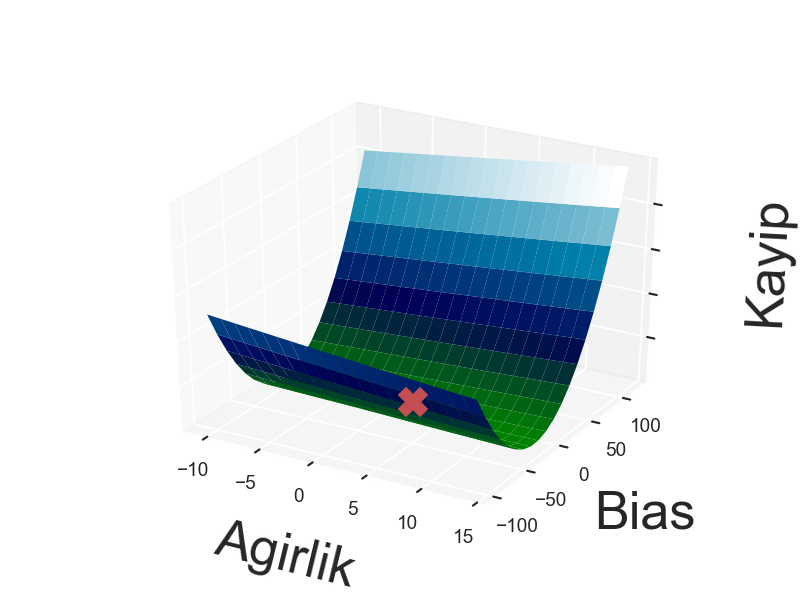

In [4]:
agirliklar = np.linspace(-0.5, 4.0, 400)
bias = np.linspace(0, 20, 400)
kayip = np.array([np.average(((X*w + b) - y )**2) for w, b in zip(agirliklar, bias)])

MESH_SIZE = 20
weights = np.linspace(np.min(agirliklar) - 10, np.max(agirliklar) + 10,
                      MESH_SIZE)
biases = np.linspace(np.min(bias) - 100, np.max(bias) + 100,
                     MESH_SIZE)
W, B = np.meshgrid(weights, biases)
K = kayip.reshape((MESH_SIZE, MESH_SIZE))

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Agirlik", labelpad=20, fontsize=30)
ax.set_ylabel("Bias", labelpad=20, fontsize=30)
ax.set_zlabel("Kayip", labelpad=20, fontsize=30)

ax.plot_surface(W, B, K, cmap=cm.ocean,
                linewidth=0, antialiased=True, color='black')
min_index = np.argmin(kayip)
plt.plot([agirliklar[min_index]], [bias[min_index]], [kayip[min_index]],
         "rX", markersize=16)
plt.show()

Maliyet fonksiyonu

\begin{aligned}
L = \frac{1}{m}\sum_{i=1}^{m}\left ( \left ( wx_i + b\right )-y_i \right )^{2}
\end{aligned}

Maliyet fonksiyonunun w'ye göre türevi

\begin{aligned}\frac{\partial L}{\partial w} = \frac{2}{m}\sum_{i=1}^{m}x_i\left ( \left ( wx_i + b\right )-y_i \right )\end{aligned}

Maliyet fonksiyonunun b'ye göre türevi

\begin{aligned}\frac{\partial L}{\partial b} = \frac{2}{m}\sum_{i=1}^{m}\left ( \left ( wx_i +b \right )-y_i \right )\end{aligned}

In [10]:
def prediction(X, w, b):
    return X*w + b
def loss(X, Y, w, b):
    return np.average((prediction(X, w, b) - y )**2)
def compute_gradient(X, Y, w, b):
    grad_w = 2 * np.average(X * (prediction(X, w, b) - Y))
    grad_b = 2 * np.average(prediction(X, w, b) - Y)
    return grad_w, grad_b
def fit(X, Y, total_iter, learning_rate):
    w = 40
    b = -200
    p_loss = loss(X, Y, w, b)
    log=[[w, b, p_loss]]
    for i in range(total_iter):
        #print("Iterasyon: {} Kayip: {:.5f}".format(i, loss(X,Y,w,b)))
        grad_w, grad_b = compute_gradient(X, Y, w, b)
        w -= grad_w * learning_rate
        b -= grad_b * learning_rate
        c_loss = loss(X, Y, w, b)
        log.append([w, b, c_loss])
        if( abs(c_loss - p_loss) < 0.00001):
            return w, b, log
        p_loss = c_loss
    raise Exception("dıdı dı dım!")



In [ ]:
def fit(X, Y, total_iter, learning_rate):
    w = b = 0
    for i in range(total_iter):
        print("Iterasyon: {} Kayip: {:.5f}".format(i, loss(X,Y,w,b)))
        grad_w, grad_b = compute_gradient(X, Y, w, b)
        w -= grad_w * learning_rate
        b -= grad_b * learning_rate
    return w, b

In [7]:
w, b = fit(X, y, 10000, 0.001)
w, b

Iterasyon: 0 Kayip: 812.86667
Iterasyon: 1 Kayip: 302.57696
Iterasyon: 2 Kayip: 141.98409
Iterasyon: 3 Kayip: 91.42138
Iterasyon: 4 Kayip: 75.47906
Iterasyon: 5 Kayip: 70.42988
Iterasyon: 6 Kayip: 68.80821
Iterasyon: 7 Kayip: 68.26502
Iterasyon: 8 Kayip: 68.06119
Iterasyon: 9 Kayip: 67.96419
Iterasyon: 10 Kayip: 67.90083
Iterasyon: 11 Kayip: 67.84808
Iterasyon: 12 Kayip: 67.79872
Iterasyon: 13 Kayip: 67.75045
Iterasyon: 14 Kayip: 67.70257
Iterasyon: 15 Kayip: 67.65483
Iterasyon: 16 Kayip: 67.60719
Iterasyon: 17 Kayip: 67.55960
Iterasyon: 18 Kayip: 67.51206
Iterasyon: 19 Kayip: 67.46458
Iterasyon: 20 Kayip: 67.41715
Iterasyon: 21 Kayip: 67.36977
Iterasyon: 22 Kayip: 67.32243
Iterasyon: 23 Kayip: 67.27515
Iterasyon: 24 Kayip: 67.22792
Iterasyon: 25 Kayip: 67.18074
Iterasyon: 26 Kayip: 67.13361
Iterasyon: 27 Kayip: 67.08653
Iterasyon: 28 Kayip: 67.03950
Iterasyon: 29 Kayip: 66.99252
Iterasyon: 30 Kayip: 66.94559
Iterasyon: 31 Kayip: 66.89871
Iterasyon: 32 Kayip: 66.85188
Iterasyon: 33 Kay

Iterasyon: 1188 Kayip: 35.71327
Iterasyon: 1189 Kayip: 35.69959
Iterasyon: 1190 Kayip: 35.68592
Iterasyon: 1191 Kayip: 35.67227
Iterasyon: 1192 Kayip: 35.65863
Iterasyon: 1193 Kayip: 35.64501
Iterasyon: 1194 Kayip: 35.63140
Iterasyon: 1195 Kayip: 35.61781
Iterasyon: 1196 Kayip: 35.60423
Iterasyon: 1197 Kayip: 35.59066
Iterasyon: 1198 Kayip: 35.57711
Iterasyon: 1199 Kayip: 35.56357
Iterasyon: 1200 Kayip: 35.55005
Iterasyon: 1201 Kayip: 35.53654
Iterasyon: 1202 Kayip: 35.52305
Iterasyon: 1203 Kayip: 35.50957
Iterasyon: 1204 Kayip: 35.49611
Iterasyon: 1205 Kayip: 35.48266
Iterasyon: 1206 Kayip: 35.46922
Iterasyon: 1207 Kayip: 35.45580
Iterasyon: 1208 Kayip: 35.44239
Iterasyon: 1209 Kayip: 35.42900
Iterasyon: 1210 Kayip: 35.41562
Iterasyon: 1211 Kayip: 35.40226
Iterasyon: 1212 Kayip: 35.38891
Iterasyon: 1213 Kayip: 35.37557
Iterasyon: 1214 Kayip: 35.36225
Iterasyon: 1215 Kayip: 35.34894
Iterasyon: 1216 Kayip: 35.33565
Iterasyon: 1217 Kayip: 35.32237
Iterasyon: 1218 Kayip: 35.30910
Iterasyo

Iterasyon: 2365 Kayip: 26.52361
Iterasyon: 2366 Kayip: 26.51969
Iterasyon: 2367 Kayip: 26.51578
Iterasyon: 2368 Kayip: 26.51188
Iterasyon: 2369 Kayip: 26.50798
Iterasyon: 2370 Kayip: 26.50408
Iterasyon: 2371 Kayip: 26.50019
Iterasyon: 2372 Kayip: 26.49630
Iterasyon: 2373 Kayip: 26.49242
Iterasyon: 2374 Kayip: 26.48854
Iterasyon: 2375 Kayip: 26.48467
Iterasyon: 2376 Kayip: 26.48079
Iterasyon: 2377 Kayip: 26.47693
Iterasyon: 2378 Kayip: 26.47306
Iterasyon: 2379 Kayip: 26.46921
Iterasyon: 2380 Kayip: 26.46535
Iterasyon: 2381 Kayip: 26.46150
Iterasyon: 2382 Kayip: 26.45765
Iterasyon: 2383 Kayip: 26.45381
Iterasyon: 2384 Kayip: 26.44997
Iterasyon: 2385 Kayip: 26.44614
Iterasyon: 2386 Kayip: 26.44231
Iterasyon: 2387 Kayip: 26.43848
Iterasyon: 2388 Kayip: 26.43466
Iterasyon: 2389 Kayip: 26.43084
Iterasyon: 2390 Kayip: 26.42703
Iterasyon: 2391 Kayip: 26.42322
Iterasyon: 2392 Kayip: 26.41941
Iterasyon: 2393 Kayip: 26.41561
Iterasyon: 2394 Kayip: 26.41181
Iterasyon: 2395 Kayip: 26.40802
Iterasyo

Iterasyon: 3578 Kayip: 23.85589
Iterasyon: 3579 Kayip: 23.85482
Iterasyon: 3580 Kayip: 23.85374
Iterasyon: 3581 Kayip: 23.85267
Iterasyon: 3582 Kayip: 23.85159
Iterasyon: 3583 Kayip: 23.85052
Iterasyon: 3584 Kayip: 23.84945
Iterasyon: 3585 Kayip: 23.84838
Iterasyon: 3586 Kayip: 23.84731
Iterasyon: 3587 Kayip: 23.84624
Iterasyon: 3588 Kayip: 23.84517
Iterasyon: 3589 Kayip: 23.84411
Iterasyon: 3590 Kayip: 23.84304
Iterasyon: 3591 Kayip: 23.84198
Iterasyon: 3592 Kayip: 23.84092
Iterasyon: 3593 Kayip: 23.83986
Iterasyon: 3594 Kayip: 23.83880
Iterasyon: 3595 Kayip: 23.83774
Iterasyon: 3596 Kayip: 23.83668
Iterasyon: 3597 Kayip: 23.83562
Iterasyon: 3598 Kayip: 23.83457
Iterasyon: 3599 Kayip: 23.83352
Iterasyon: 3600 Kayip: 23.83246
Iterasyon: 3601 Kayip: 23.83141
Iterasyon: 3602 Kayip: 23.83036
Iterasyon: 3603 Kayip: 23.82931
Iterasyon: 3604 Kayip: 23.82826
Iterasyon: 3605 Kayip: 23.82721
Iterasyon: 3606 Kayip: 23.82617
Iterasyon: 3607 Kayip: 23.82512
Iterasyon: 3608 Kayip: 23.82408
Iterasyo

Iterasyon: 4801 Kayip: 23.11866
Iterasyon: 4802 Kayip: 23.11836
Iterasyon: 4803 Kayip: 23.11807
Iterasyon: 4804 Kayip: 23.11778
Iterasyon: 4805 Kayip: 23.11749
Iterasyon: 4806 Kayip: 23.11719
Iterasyon: 4807 Kayip: 23.11690
Iterasyon: 4808 Kayip: 23.11661
Iterasyon: 4809 Kayip: 23.11632
Iterasyon: 4810 Kayip: 23.11603
Iterasyon: 4811 Kayip: 23.11574
Iterasyon: 4812 Kayip: 23.11545
Iterasyon: 4813 Kayip: 23.11516
Iterasyon: 4814 Kayip: 23.11487
Iterasyon: 4815 Kayip: 23.11458
Iterasyon: 4816 Kayip: 23.11429
Iterasyon: 4817 Kayip: 23.11400
Iterasyon: 4818 Kayip: 23.11371
Iterasyon: 4819 Kayip: 23.11342
Iterasyon: 4820 Kayip: 23.11314
Iterasyon: 4821 Kayip: 23.11285
Iterasyon: 4822 Kayip: 23.11256
Iterasyon: 4823 Kayip: 23.11228
Iterasyon: 4824 Kayip: 23.11199
Iterasyon: 4825 Kayip: 23.11170
Iterasyon: 4826 Kayip: 23.11142
Iterasyon: 4827 Kayip: 23.11113
Iterasyon: 4828 Kayip: 23.11085
Iterasyon: 4829 Kayip: 23.11056
Iterasyon: 4830 Kayip: 23.11028
Iterasyon: 4831 Kayip: 23.10999
Iterasyo

Iterasyon: 5993 Kayip: 22.92040
Iterasyon: 5994 Kayip: 22.92032
Iterasyon: 5995 Kayip: 22.92023
Iterasyon: 5996 Kayip: 22.92015
Iterasyon: 5997 Kayip: 22.92007
Iterasyon: 5998 Kayip: 22.91999
Iterasyon: 5999 Kayip: 22.91990
Iterasyon: 6000 Kayip: 22.91982
Iterasyon: 6001 Kayip: 22.91974
Iterasyon: 6002 Kayip: 22.91966
Iterasyon: 6003 Kayip: 22.91958
Iterasyon: 6004 Kayip: 22.91950
Iterasyon: 6005 Kayip: 22.91941
Iterasyon: 6006 Kayip: 22.91933
Iterasyon: 6007 Kayip: 22.91925
Iterasyon: 6008 Kayip: 22.91917
Iterasyon: 6009 Kayip: 22.91909
Iterasyon: 6010 Kayip: 22.91901
Iterasyon: 6011 Kayip: 22.91893
Iterasyon: 6012 Kayip: 22.91885
Iterasyon: 6013 Kayip: 22.91876
Iterasyon: 6014 Kayip: 22.91868
Iterasyon: 6015 Kayip: 22.91860
Iterasyon: 6016 Kayip: 22.91852
Iterasyon: 6017 Kayip: 22.91844
Iterasyon: 6018 Kayip: 22.91836
Iterasyon: 6019 Kayip: 22.91828
Iterasyon: 6020 Kayip: 22.91820
Iterasyon: 6021 Kayip: 22.91812
Iterasyon: 6022 Kayip: 22.91804
Iterasyon: 6023 Kayip: 22.91796
Iterasyo

Iterasyon: 7200 Kayip: 22.86425
Iterasyon: 7201 Kayip: 22.86423
Iterasyon: 7202 Kayip: 22.86420
Iterasyon: 7203 Kayip: 22.86418
Iterasyon: 7204 Kayip: 22.86416
Iterasyon: 7205 Kayip: 22.86414
Iterasyon: 7206 Kayip: 22.86411
Iterasyon: 7207 Kayip: 22.86409
Iterasyon: 7208 Kayip: 22.86407
Iterasyon: 7209 Kayip: 22.86405
Iterasyon: 7210 Kayip: 22.86402
Iterasyon: 7211 Kayip: 22.86400
Iterasyon: 7212 Kayip: 22.86398
Iterasyon: 7213 Kayip: 22.86395
Iterasyon: 7214 Kayip: 22.86393
Iterasyon: 7215 Kayip: 22.86391
Iterasyon: 7216 Kayip: 22.86389
Iterasyon: 7217 Kayip: 22.86386
Iterasyon: 7218 Kayip: 22.86384
Iterasyon: 7219 Kayip: 22.86382
Iterasyon: 7220 Kayip: 22.86380
Iterasyon: 7221 Kayip: 22.86377
Iterasyon: 7222 Kayip: 22.86375
Iterasyon: 7223 Kayip: 22.86373
Iterasyon: 7224 Kayip: 22.86371
Iterasyon: 7225 Kayip: 22.86369
Iterasyon: 7226 Kayip: 22.86366
Iterasyon: 7227 Kayip: 22.86364
Iterasyon: 7228 Kayip: 22.86362
Iterasyon: 7229 Kayip: 22.86360
Iterasyon: 7230 Kayip: 22.86357
Iterasyo

Iterasyon: 8410 Kayip: 22.84868
Iterasyon: 8411 Kayip: 22.84867
Iterasyon: 8412 Kayip: 22.84866
Iterasyon: 8413 Kayip: 22.84866
Iterasyon: 8414 Kayip: 22.84865
Iterasyon: 8415 Kayip: 22.84865
Iterasyon: 8416 Kayip: 22.84864
Iterasyon: 8417 Kayip: 22.84863
Iterasyon: 8418 Kayip: 22.84863
Iterasyon: 8419 Kayip: 22.84862
Iterasyon: 8420 Kayip: 22.84861
Iterasyon: 8421 Kayip: 22.84861
Iterasyon: 8422 Kayip: 22.84860
Iterasyon: 8423 Kayip: 22.84860
Iterasyon: 8424 Kayip: 22.84859
Iterasyon: 8425 Kayip: 22.84858
Iterasyon: 8426 Kayip: 22.84858
Iterasyon: 8427 Kayip: 22.84857
Iterasyon: 8428 Kayip: 22.84856
Iterasyon: 8429 Kayip: 22.84856
Iterasyon: 8430 Kayip: 22.84855
Iterasyon: 8431 Kayip: 22.84855
Iterasyon: 8432 Kayip: 22.84854
Iterasyon: 8433 Kayip: 22.84853
Iterasyon: 8434 Kayip: 22.84853
Iterasyon: 8435 Kayip: 22.84852
Iterasyon: 8436 Kayip: 22.84852
Iterasyon: 8437 Kayip: 22.84851
Iterasyon: 8438 Kayip: 22.84850
Iterasyon: 8439 Kayip: 22.84850
Iterasyon: 8440 Kayip: 22.84849
Iterasyo

Iterasyon: 9705 Kayip: 22.84424
Iterasyon: 9706 Kayip: 22.84423
Iterasyon: 9707 Kayip: 22.84423
Iterasyon: 9708 Kayip: 22.84423
Iterasyon: 9709 Kayip: 22.84423
Iterasyon: 9710 Kayip: 22.84423
Iterasyon: 9711 Kayip: 22.84423
Iterasyon: 9712 Kayip: 22.84422
Iterasyon: 9713 Kayip: 22.84422
Iterasyon: 9714 Kayip: 22.84422
Iterasyon: 9715 Kayip: 22.84422
Iterasyon: 9716 Kayip: 22.84422
Iterasyon: 9717 Kayip: 22.84422
Iterasyon: 9718 Kayip: 22.84421
Iterasyon: 9719 Kayip: 22.84421
Iterasyon: 9720 Kayip: 22.84421
Iterasyon: 9721 Kayip: 22.84421
Iterasyon: 9722 Kayip: 22.84421
Iterasyon: 9723 Kayip: 22.84421
Iterasyon: 9724 Kayip: 22.84421
Iterasyon: 9725 Kayip: 22.84420
Iterasyon: 9726 Kayip: 22.84420
Iterasyon: 9727 Kayip: 22.84420
Iterasyon: 9728 Kayip: 22.84420
Iterasyon: 9729 Kayip: 22.84420
Iterasyon: 9730 Kayip: 22.84420
Iterasyon: 9731 Kayip: 22.84419
Iterasyon: 9732 Kayip: 22.84419
Iterasyon: 9733 Kayip: 22.84419
Iterasyon: 9734 Kayip: 22.84419
Iterasyon: 9735 Kayip: 22.84419
Iterasyo

(1.0848258524488616, 13.108507160092502)

<IPython.core.display.Javascript object>


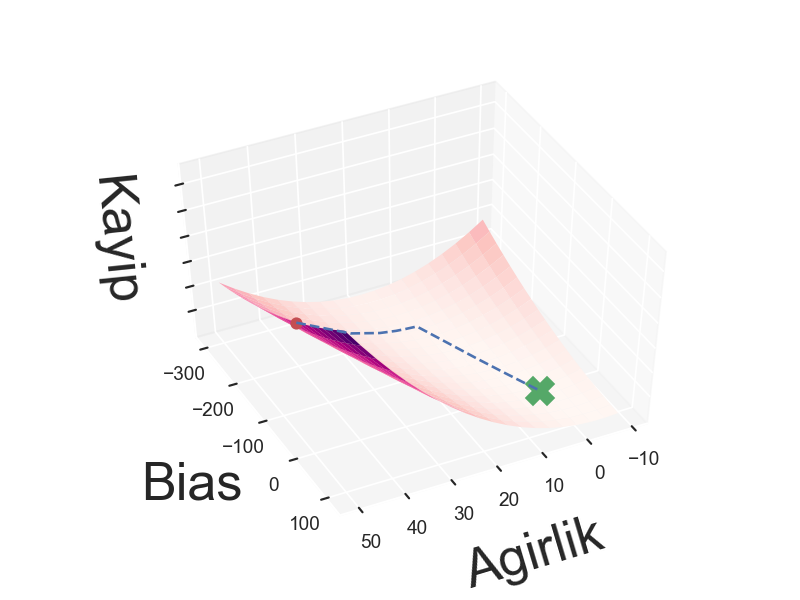

In [11]:
X, y = np.loadtxt("ornek_data.txt", skiprows=1, unpack=True)
w,b,log = fit(X,y,100000,0.001)
log = np.array(log)

ms = 20 # mesh size
ws = np.linspace(np.min(log[:,0]) - 10, np.max(log[:,0]) + 10,
                      ms)
bs = np.linspace(np.min(log[:,1]) - 100, np.max(log[:,1]) + 100,
                     ms)
W, B = np.meshgrid(ws, bs)
losses = np.array([loss(X, y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((ms,ms))
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Agirlik", labelpad=20, fontsize=30)
ax.set_ylabel("Bias", labelpad=20, fontsize=30)
ax.set_zlabel("Kayip", labelpad=5, fontsize=30)
ax.plot_surface(W, B, L, cmap=cm.RdPu, linewidth=0, antialiased=True)

# endpoint
plt.plot([log[-1,0]], [log[-1,1]], [log[-1,2]],
         "gX", markersize=16)

plt.show()

plt.plot([log[0,0]], [log[0,1]], [log[0,2]], "ro")
plt.plot(log[:,0], log[:,1], log[:,2], color="b", linestyle="dashed")